In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

fit means getting min and max value of data


creating a datastructure with 60 timesteps

In [5]:
X_train = []
Y_train = []
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)





Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

Building RNN

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initializing RNN


In [11]:
regressor =  Sequential()

Adding the first LSTM layer some dropout regularisation to avoid overfitting. return_sequences should be true to add further layers. Dropout rate specifies how much percentage of nuerons should be ignored in the LSTM layers

In [14]:
regressor.add(LSTM(units = 60, return_sequences= True ,input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Adding the second LSTM layer some dropout regularisation to avoid overfitting. input shape is only specified for the first layer all the time

In [12]:
regressor.add(LSTM(units = 60, return_sequences= True ))
regressor.add(Dropout(0.2))

Adding the third LSTM layer some dropout regularisation

In [15]:
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

Adding the third LSTM layer some dropout regularisation. return sequences is false for last LSTM layer.

In [16]:
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

Adding the output layer

In [17]:
regressor.add(Dense(units = 1))


compiling RNN. RMSprop should be the first choice for optimizer in rnn, but we are choosing adam optimizer here


In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

fitting rnn

In [19]:
regressor.fit(X_train , Y_train , epochs = 150, batch_size = 32 )

Epoch 1/150
38/38 [==============================] - 20s 206ms/step - loss: 0.0468
Epoch 2/150
38/38 [==============================] - 7s 196ms/step - loss: 0.0059
Epoch 3/150
38/38 [==============================] - 8s 206ms/step - loss: 0.0059
Epoch 4/150
38/38 [==============================] - 6s 171ms/step - loss: 0.0058
Epoch 5/150
38/38 [==============================] - 8s 207ms/step - loss: 0.0057
Epoch 6/150
38/38 [==============================] - 7s 179ms/step - loss: 0.0050
Epoch 7/150
38/38 [==============================] - 8s 197ms/step - loss: 0.0044
Epoch 8/150
38/38 [==============================] - 8s 202ms/step - loss: 0.0048
Epoch 9/150
38/38 [==============================] - 7s 172ms/step - loss: 0.0048
Epoch 10/150
38/38 [==============================] - 9s 232ms/step - loss: 0.0051
Epoch 11/150
38/38 [==============================] - 7s 177ms/step - loss: 0.0040
Epoch 12/150
38/38 [==============================] - 8s 207ms/step - loss: 0.0042
Epoch 13/150

visualization of the results


In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_price = dataset_test.iloc[:,1:2].values
real_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

Prediction of stock price
horizontal axis(rows) = 1
vertical axis(columns) = 0. values are used convert dataframes in numpy array

In [23]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(training_set_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)
pred

1/1 [==============================] - 0s 81ms/step


array([[321.29214],
       [322.5188 ],
       [323.08508],
       [321.396  ],
       [319.85748],
       [318.2725 ],
       [316.1806 ],
       [313.94357],
       [313.1972 ],
       [313.63184],
       [315.5716 ],
       [318.32037],
       [316.52005],
       [310.50513],
       [304.85025],
       [301.58426],
       [300.42664],
       [298.8354 ],
       [297.90445],
       [298.6372 ]], dtype=float32)

visualizing the results

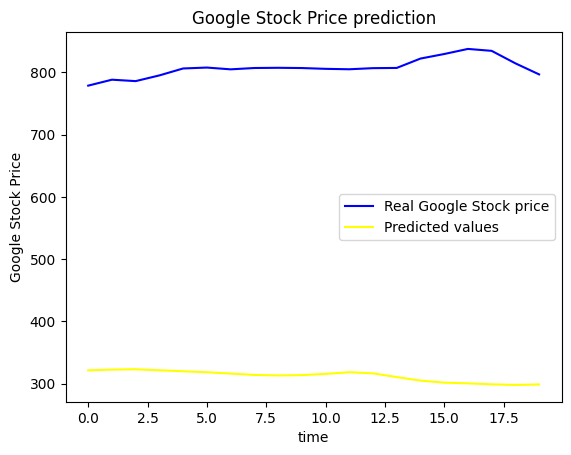

In [24]:
plt.plot(real_price, color = 'blue', label = 'Real Google Stock price')
plt.plot(pred, color = 'yellow', label = 'Predicted values')
plt.title('Google Stock Price prediction')
plt.xlabel('time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()